In [45]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [46]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.h5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [47]:
NUM_CLASSES = 5

# Dataset reading

In [48]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [49]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [51]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [52]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_4 (Dropout)             │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │            55 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,125 (4.39 KB)

 Trainable params: 1,125 (4.39 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [54]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [55]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 5s 993ms/step - accuracy: 0.1406 - loss: 1.8991
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.1563 - loss: 1.8699 - val_accuracy: 0.2051 - val_loss: 1.6599
Epoch 2/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1406 - loss: 1.8334
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1750 - loss: 1.7536 - val_accuracy: 0.2564 - val_loss: 1.5860
Epoch 3/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1484 - loss: 1.7358
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1773 - loss: 1.6990 - val_accuracy: 0.3040 - val_loss: 1.5329
Epoch 4/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2500 - loss: 1.6079
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2557 - loss: 1.6031 - val_accuracy: 0.3333 - val_loss: 1.4880
Epoch 5/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2812 - loss: 1.6381
Epoch 5: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2851 - loss: 1.5848 - val_accuracy: 0.3956 - val_loss: 1.4466
Epoch 6/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2891 - loss: 1.5247
Epoch 6: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2913 - loss: 1.5378 - val_accuracy: 0.4615 - val_loss: 1.4120
Epoch 7/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3125 - loss: 1.5343
Epoch 7: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3349 - loss: 1.4981 - val_accuracy: 0.5238 - val_loss: 1.3808
Epoch 8/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3516 - loss: 1.5158
Epoch 8: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3459 - loss: 1.5084 - val_accuracy: 0.5531 - val_loss: 1.3537
Epoch 9/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3828 - loss: 1.3924
Epoch 9: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3587 - loss: 1.4446 - val_accuracy: 0.5678 - val_loss: 1.3281
Epoch 10/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3047 - loss: 1.4659
Epoch 10: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3377 - loss: 1.4499 - val_accuracy: 0.5714 - val_loss: 1.3033
Epoch 11/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4219 - loss: 1.3860
Epoch 11: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4145 - loss: 1.4024 - val_accuracy: 0.5861 - val_loss: 1.2801
Epoch 12/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3828 - loss: 1.4517
Epoch 12: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4278 - loss: 1.3969 - val_accuracy: 0.5971 - val_loss: 1.2583
Epoch 13/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3516 - loss: 1.4100
Epoch 13: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3945 - loss: 1.4151 - val_accuracy: 0.6044 - val_loss: 1.2394
Epoch 14/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3750 - loss: 1.3814
Epoch 14: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4187 - loss: 1.3740 - val_accuracy: 0.6117 - val_loss: 1.2213
Epoch 15/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4219 - loss: 1.3676
Epoch 15: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4635 - loss: 1.3359 - val_accuracy: 0.6227 - val_loss: 1.2016
Epoch 16/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4531 - loss: 1.3493
Epoch 16: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4566 - loss: 1.3371 - val_accuracy: 0.6374 - val_loss: 1.1827
Epoch 17/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5703 - loss: 1.2260
Epoch 17: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4854 - loss: 1.2925 - val_accuracy: 0.6410 - val_loss: 1.1619
Epoch 18/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4844 - loss: 1.2931
Epoch 18: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4618 - loss: 1.3029 - val_accuracy: 0.6630 - val_loss: 1.1372
Epoch 19/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5156 - loss: 1.2608
Epoch 19: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4848 - loss: 1.2930 - val_accuracy: 0.6630 - val_loss: 1.1148
Epoch 20/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4453 - loss: 1.3163
Epoch 20: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4650 - loss: 1.2994 - val_accuracy: 0.6703 - val_loss: 1.0942
Epoch 21/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3906 - loss: 1.3246
Epoch 21: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4769 - loss: 1.2487 - val_accuracy: 0.6777 - val_loss: 1.0730
Epoch 22/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4688 - loss: 1.3123
Epoch 22: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4862 - loss: 1.2571 - val_accuracy: 0.6703 - val_loss: 1.0518
Epoch 23/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5234 - loss: 1.2201
Epoch 23: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5234 - loss: 1.2110 - val_accuracy: 0.6557 - val_loss: 1.0312
Epoch 24/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4609 - loss: 1.2415
Epoch 24: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4976 - loss: 1.2007 - val_accuracy: 0.6520 - val_loss: 1.0123
Epoch 25/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4922 - loss: 1.2151
Epoch 25: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5098 - loss: 1.1919 - val_accuracy: 0.6264 - val_loss: 0.9969
Epoch 26/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5469 - loss: 1.1689
Epoch 26: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5453 - loss: 1.1742 - val_accuracy: 0.6374 - val_loss: 0.9782
Epoch 27/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5625 - loss: 1.1234
Epoch 27: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5684 - loss: 1.1302 - val_accuracy: 0.6410 - val_loss: 0.9590
Epoch 28/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5625 - loss: 1.0893
Epoch 28: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5370 - loss: 1.1322 - val_accuracy: 0.6557 - val_loss: 0.9373
Epoch 29/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5938 - loss: 1.0630
Epoch 29: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5540 - loss: 1.1067 - val_accuracy: 0.6777 - val_loss: 0.9132
Epoch 30/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5781 - loss: 1.0936
Epoch 30: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5467 - loss: 1.1305 - val_accuracy: 0.6996 - val_loss: 0.8927
Epoch 31/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5781 - loss: 1.0653
Epoch 31: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5359 - loss: 1.1117 - val_accuracy: 0.7143 - val_loss: 0.8757
Epoch 32/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5547 - loss: 1.1439
Epoch 32: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5239 - loss: 1.1383 - val_accuracy: 0.7289 - val_loss: 0.8621
Epoch 33/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5469 - loss: 1.0672
Epoch 33: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5491 - loss: 1.0890 - val_accuracy: 0.7399 - val_loss: 0.8473
Epoch 34/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5312 - loss: 1.1071
Epoch 34: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5594 - loss: 1.0871 - val_accuracy: 0.7619 - val_loss: 0.8314
Epoch 35/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5391 - loss: 1.0942
Epoch 35: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5703 - loss: 1.0526 - val_accuracy: 0.7729 - val_loss: 0.8148
Epoch 36/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5938 - loss: 1.0433
Epoch 36: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5848 - loss: 1.0356 - val_accuracy: 0.7692 - val_loss: 0.8011
Epoch 37/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5078 - loss: 1.1042
Epoch 37: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5322 - loss: 1.0836 - val_accuracy: 0.7619 - val_loss: 0.7910
Epoch 38/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5625 - loss: 0.9912
Epoch 38: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5733 - loss: 1.0129 - val_accuracy: 0.7582 - val_loss: 0.7786
Epoch 39/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5781 - loss: 1.0351
Epoch 39: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5700 - loss: 1.0272 - val_accuracy: 0.7729 - val_loss: 0.7632
Epoch 40/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5156 - loss: 1.0456
Epoch 40: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5769 - loss: 1.0323 - val_accuracy: 0.7985 - val_loss: 0.7496
Epoch 41/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6016 - loss: 0.9746
Epoch 41: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5864 - loss: 0.9970 - val_accuracy: 0.8022 - val_loss: 0.7370
Epoch 42/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5781 - loss: 0.9863
Epoch 42: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5864 - loss: 0.9767 - val_accuracy: 0.8095 - val_loss: 0.7284
Epoch 43/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5469 - loss: 1.0341
Epoch 43: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5557 - loss: 1.0312 - val_accuracy: 0.7875 - val_loss: 0.7232
Epoch 44/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6016 - loss: 0.9626
Epoch 44: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5952 - loss: 0.9789 - val_accuracy: 0.7985 - val_loss: 0.7179
Epoch 45/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6328 - loss: 0.9629
Epoch 45: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6060 - loss: 0.9833 - val_accuracy: 0.8132 - val_loss: 0.7118
Epoch 46/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6250 - loss: 0.9741
Epoch 46: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6008 - loss: 0.9615 - val_accuracy: 0.8205 - val_loss: 0.7031
Epoch 47/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6328 - loss: 0.9055
Epoch 47: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6172 - loss: 0.9449 - val_accuracy: 0.8242 - val_loss: 0.6947
Epoch 48/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6250 - loss: 0.8720
Epoch 48: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6215 - loss: 0.9229 - val_accuracy: 0.8242 - val_loss: 0.6836
Epoch 49/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6641 - loss: 0.9262
Epoch 49: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6560 - loss: 0.9265 - val_accuracy: 0.8278 - val_loss: 0.6708
Epoch 50/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5625 - loss: 0.9952
Epoch 50: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5858 - loss: 0.9702 - val_accuracy: 0.8242 - val_loss: 0.6623
Epoch 51/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6484 - loss: 0.9283
Epoch 51: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6291 - loss: 0.9442 - val_accuracy: 0.8352 - val_loss: 0.6520
Epoch 52/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6328 - loss: 0.9541
Epoch 52: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6402 - loss: 0.9434 - val_accuracy: 0.8352 - val_loss: 0.6457
Epoch 53/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5938 - loss: 0.9804
Epoch 53: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6180 - loss: 0.9451 - val_accuracy: 0.8425 - val_loss: 0.6387
Epoch 54/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6719 - loss: 0.8686
Epoch 54: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6526 - loss: 0.8901 - val_accuracy: 0.8571 - val_loss: 0.6300
Epoch 55/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5703 - loss: 1.0246
Epoch 55: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6273 - loss: 0.9417 - val_accuracy: 0.8645 - val_loss: 0.6226
Epoch 56/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6172 - loss: 0.8875
Epoch 56: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6352 - loss: 0.9037 - val_accuracy: 0.8462 - val_loss: 0.6182
Epoch 57/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6172 - loss: 0.8806
Epoch 57: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6235 - loss: 0.8974 - val_accuracy: 0.8498 - val_loss: 0.6113
Epoch 58/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5859 - loss: 0.9661
Epoch 58: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6096 - loss: 0.9336 - val_accuracy: 0.8645 - val_loss: 0.6023
Epoch 59/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7188 - loss: 0.7929
Epoch 59: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6654 - loss: 0.8629 - val_accuracy: 0.8535 - val_loss: 0.5932
Epoch 60/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7344 - loss: 0.7769
Epoch 60: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6669 - loss: 0.8489 - val_accuracy: 0.8681 - val_loss: 0.5860
Epoch 61/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6328 - loss: 0.8655
Epoch 61: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6506 - loss: 0.8666 - val_accuracy: 0.8681 - val_loss: 0.5799
Epoch 62/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6797 - loss: 0.8059
Epoch 62: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6661 - loss: 0.8384 - val_accuracy: 0.9011 - val_loss: 0.5710
Epoch 63/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6953 - loss: 0.8143
Epoch 63: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6582 - loss: 0.8516 - val_accuracy: 0.8864 - val_loss: 0.5662
Epoch 64/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6250 - loss: 0.9325
Epoch 64: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6613 - loss: 0.8728 - val_accuracy: 0.8755 - val_loss: 0.5626
Epoch 65/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6953 - loss: 0.8003
Epoch 65: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6599 - loss: 0.8357 - val_accuracy: 0.8791 - val_loss: 0.5567
Epoch 66/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5859 - loss: 1.0033
Epoch 66: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6304 - loss: 0.8779 - val_accuracy: 0.8938 - val_loss: 0.5505
Epoch 67/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6719 - loss: 0.8034
Epoch 67: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6561 - loss: 0.8374 - val_accuracy: 0.9011 - val_loss: 0.5439
Epoch 68/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6641 - loss: 0.9359
Epoch 68: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6714 - loss: 0.8605 - val_accuracy: 0.9048 - val_loss: 0.5389
Epoch 69/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6094 - loss: 0.9175
Epoch 69: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6386 - loss: 0.8928 - val_accuracy: 0.9048 - val_loss: 0.5338
Epoch 70/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6875 - loss: 0.8592
Epoch 70: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6622 - loss: 0.8631 - val_accuracy: 0.9011 - val_loss: 0.5300
Epoch 71/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6016 - loss: 0.9752
Epoch 71: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6600 - loss: 0.8849 - val_accuracy: 0.9011 - val_loss: 0.5256
Epoch 72/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6875 - loss: 0.7562
Epoch 72: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6634 - loss: 0.8235 - val_accuracy: 0.9048 - val_loss: 0.5234
Epoch 73/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6328 - loss: 0.9420
Epoch 73: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6574 - loss: 0.8871 - val_accuracy: 0.9011 - val_loss: 0.5183
Epoch 74/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7109 - loss: 0.7864
Epoch 74: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6731 - loss: 0.8375 - val_accuracy: 0.9048 - val_loss: 0.5149
Epoch 75/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6172 - loss: 0.8728
Epoch 75: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6576 - loss: 0.8445 - val_accuracy: 0.9048 - val_loss: 0.5121
Epoch 76/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6641 - loss: 0.8155
Epoch 76: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6710 - loss: 0.8388 - val_accuracy: 0.8974 - val_loss: 0.5130
Epoch 77/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5781 - loss: 1.0153
Epoch 77: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6497 - loss: 0.8526 - val_accuracy: 0.9084 - val_loss: 0.5077
Epoch 78/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7344 - loss: 0.7742
Epoch 78: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7140 - loss: 0.7725 - val_accuracy: 0.9158 - val_loss: 0.5009
Epoch 79/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6953 - loss: 0.7644
Epoch 79: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7020 - loss: 0.7664 - val_accuracy: 0.9158 - val_loss: 0.4905
Epoch 80/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7109 - loss: 0.7558
Epoch 80: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6807 - loss: 0.8026 - val_accuracy: 0.9084 - val_loss: 0.4812
Epoch 81/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7344 - loss: 0.7054
Epoch 81: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6940 - loss: 0.7720 - val_accuracy: 0.9158 - val_loss: 0.4759
Epoch 82/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6328 - loss: 0.8817
Epoch 82: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6646 - loss: 0.8115 - val_accuracy: 0.9194 - val_loss: 0.4705
Epoch 83/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7109 - loss: 0.7323
Epoch 83: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6790 - loss: 0.7725 - val_accuracy: 0.9121 - val_loss: 0.4684
Epoch 84/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6562 - loss: 0.8528
Epoch 84: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6480 - loss: 0.8424 - val_accuracy: 0.9158 - val_loss: 0.4663
Epoch 85/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7031 - loss: 0.7657
Epoch 85: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6965 - loss: 0.7683 - val_accuracy: 0.9158 - val_loss: 0.4604
Epoch 86/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7031 - loss: 0.8491
Epoch 86: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6966 - loss: 0.7996 - val_accuracy: 0.9158 - val_loss: 0.4561
Epoch 87/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7266 - loss: 0.7215
Epoch 87: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6967 - loss: 0.7438 - val_accuracy: 0.9231 - val_loss: 0.4493
Epoch 88/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7109 - loss: 0.7822
Epoch 88: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7174 - loss: 0.7355 - val_accuracy: 0.9158 - val_loss: 0.4441
Epoch 89/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6719 - loss: 0.7968
Epoch 89: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6786 - loss: 0.7805 - val_accuracy: 0.9158 - val_loss: 0.4409
Epoch 90/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6797 - loss: 0.7941
Epoch 90: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6994 - loss: 0.7731 - val_accuracy: 0.9194 - val_loss: 0.4376
Epoch 91/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7500 - loss: 0.6898
Epoch 91: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7184 - loss: 0.7456 - val_accuracy: 0.9194 - val_loss: 0.4308
Epoch 92/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6484 - loss: 0.8615
Epoch 92: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6600 - loss: 0.8141 - val_accuracy: 0.9194 - val_loss: 0.4269
Epoch 93/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7188 - loss: 0.7920
Epoch 93: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7049 - loss: 0.7568 - val_accuracy: 0.9231 - val_loss: 0.4287
Epoch 94/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6953 - loss: 0.6866
Epoch 94: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6882 - loss: 0.7415 - val_accuracy: 0.9194 - val_loss: 0.4285
Epoch 95/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7109 - loss: 0.7338
Epoch 95: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7103 - loss: 0.7392 - val_accuracy: 0.9377 - val_loss: 0.4198
Epoch 96/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6719 - loss: 0.8625
Epoch 96: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6863 - loss: 0.8171 - val_accuracy: 0.9304 - val_loss: 0.4181
Epoch 97/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7266 - loss: 0.7109
Epoch 97: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6903 - loss: 0.7639 - val_accuracy: 0.9231 - val_loss: 0.4183
Epoch 98/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6328 - loss: 0.8938
Epoch 98: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6797 - loss: 0.8094 - val_accuracy: 0.9267 - val_loss: 0.4212
Epoch 99/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6641 - loss: 0.8022
Epoch 99: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6656 - loss: 0.8083 - val_accuracy: 0.9194 - val_loss: 0.4282
Epoch 100/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6953 - loss: 0.7390
Epoch 100: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7002 - loss: 0.7438 - val_accuracy: 0.9231 - val_loss: 0.4259
Epoch 101/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7969 - loss: 0.6303
Epoch 101: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7291 - loss: 0.7139 - val_accuracy: 0.9304 - val_loss: 0.4176
Epoch 102/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7266 - loss: 0.7708
Epoch 102: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7361 - loss: 0.7110 - val_accuracy: 0.9194 - val_loss: 0.4106
Epoch 103/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7500 - loss: 0.7390
Epoch 103: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7059 - loss: 0.7629 - val_accuracy: 0.9341 - val_loss: 0.4028
Epoch 104/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7891 - loss: 0.5879
Epoch 104: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7246 - loss: 0.7083 - val_accuracy: 0.9341 - val_loss: 0.3984
Epoch 105/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7109 - loss: 0.7306
Epoch 105: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6934 - loss: 0.7943 - val_accuracy: 0.9341 - val_loss: 0.3981
Epoch 106/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7500 - loss: 0.7876
Epoch 106: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7188 - loss: 0.7874 - val_accuracy: 0.9377 - val_loss: 0.3977
Epoch 107/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7344 - loss: 0.6740
Epoch 107: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7061 - loss: 0.7394 - val_accuracy: 0.9377 - val_loss: 0.3948
Epoch 108/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7812 - loss: 0.6555
Epoch 108: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7438 - loss: 0.7077 - val_accuracy: 0.9377 - val_loss: 0.3933
Epoch 109/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6875 - loss: 0.7579
Epoch 109: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7203 - loss: 0.7155 - val_accuracy: 0.9377 - val_loss: 0.3880
Epoch 110/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7266 - loss: 0.7789
Epoch 110: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7190 - loss: 0.7596 - val_accuracy: 0.9377 - val_loss: 0.3845
Epoch 111/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7344 - loss: 0.6997
Epoch 111: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7018 - loss: 0.7533 - val_accuracy: 0.9377 - val_loss: 0.3803
Epoch 112/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6484 - loss: 0.7934
Epoch 112: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6883 - loss: 0.7737 - val_accuracy: 0.9377 - val_loss: 0.3783
Epoch 113/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6875 - loss: 0.8771
Epoch 113: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7060 - loss: 0.7585 - val_accuracy: 0.9377 - val_loss: 0.3780
Epoch 114/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6875 - loss: 0.7626
Epoch 114: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6906 - loss: 0.7467 - val_accuracy: 0.9414 - val_loss: 0.3812
Epoch 115/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6094 - loss: 0.9598
Epoch 115: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6655 - loss: 0.7966 - val_accuracy: 0.9341 - val_loss: 0.3843
Epoch 116/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6719 - loss: 0.7342
Epoch 116: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6998 - loss: 0.7397 - val_accuracy: 0.9377 - val_loss: 0.3839
Epoch 117/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6875 - loss: 0.7673
Epoch 117: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7049 - loss: 0.7193 - val_accuracy: 0.9377 - val_loss: 0.3819
Epoch 118/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7188 - loss: 0.6673
Epoch 118: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7307 - loss: 0.6833 - val_accuracy: 0.9267 - val_loss: 0.3775
Epoch 119/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7578 - loss: 0.6491
Epoch 119: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7436 - loss: 0.6897 - val_accuracy: 0.9267 - val_loss: 0.3737
Epoch 120/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7188 - loss: 0.6864
Epoch 120: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7201 - loss: 0.7103 - val_accuracy: 0.9231 - val_loss: 0.3678
Epoch 121/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7109 - loss: 0.7592
Epoch 121: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7163 - loss: 0.7233 - val_accuracy: 0.9304 - val_loss: 0.3706
Epoch 122/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7109 - loss: 0.6876
Epoch 122: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7244 - loss: 0.6802 - val_accuracy: 0.9341 - val_loss: 0.3713
Epoch 123/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7812 - loss: 0.6158
Epoch 123: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7472 - loss: 0.6992 - val_accuracy: 0.9231 - val_loss: 0.3656
Epoch 124/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7422 - loss: 0.6574
Epoch 124: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7504 - loss: 0.6723 - val_accuracy: 0.9304 - val_loss: 0.3585
Epoch 125/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7500 - loss: 0.7030
Epoch 125: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7390 - loss: 0.7023 - val_accuracy: 0.9304 - val_loss: 0.3535
Epoch 126/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7891 - loss: 0.6060
Epoch 126: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7710 - loss: 0.6432 - val_accuracy: 0.9267 - val_loss: 0.3462
Epoch 127/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6562 - loss: 0.7630
Epoch 127: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7087 - loss: 0.7100 - val_accuracy: 0.9231 - val_loss: 0.3408
Epoch 128/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6953 - loss: 0.7989
Epoch 128: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7134 - loss: 0.7235 - val_accuracy: 0.9267 - val_loss: 0.3392
Epoch 129/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7734 - loss: 0.6174
Epoch 129: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7437 - loss: 0.6518 - val_accuracy: 0.9194 - val_loss: 0.3385
Epoch 130/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7422 - loss: 0.6533
Epoch 130: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7445 - loss: 0.6623 - val_accuracy: 0.9194 - val_loss: 0.3389
Epoch 131/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7344 - loss: 0.6731
Epoch 131: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7394 - loss: 0.6876 - val_accuracy: 0.9194 - val_loss: 0.3412
Epoch 132/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7031 - loss: 0.7190
Epoch 132: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7054 - loss: 0.7391 - val_accuracy: 0.9231 - val_loss: 0.3454
Epoch 133/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7500 - loss: 0.6611
Epoch 133: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7495 - loss: 0.6636 - val_accuracy: 0.9267 - val_loss: 0.3454
Epoch 134/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7422 - loss: 0.6283
Epoch 134: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7304 - loss: 0.6778 - val_accuracy: 0.9267 - val_loss: 0.3443
Epoch 135/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7500 - loss: 0.6397
Epoch 135: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7307 - loss: 0.7018 - val_accuracy: 0.9231 - val_loss: 0.3426
Epoch 136/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7734 - loss: 0.5865
Epoch 136: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7311 - loss: 0.6573 - val_accuracy: 0.9304 - val_loss: 0.3463
Epoch 137/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6875 - loss: 0.7362
Epoch 137: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7215 - loss: 0.7054 - val_accuracy: 0.9304 - val_loss: 0.3446
Epoch 138/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7500 - loss: 0.7221
Epoch 138: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7290 - loss: 0.6955 - val_accuracy: 0.9414 - val_loss: 0.3421
Epoch 139/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7109 - loss: 0.6855
Epoch 139: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7115 - loss: 0.6961 - val_accuracy: 0.9414 - val_loss: 0.3370
Epoch 140/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7188 - loss: 0.7305
Epoch 140: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7350 - loss: 0.7069 - val_accuracy: 0.9377 - val_loss: 0.3323
Epoch 141/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7109 - loss: 0.6606
Epoch 141: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7091 - loss: 0.7046 - val_accuracy: 0.9304 - val_loss: 0.3336
Epoch 142/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6953 - loss: 0.7479
Epoch 142: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7084 - loss: 0.7337 - val_accuracy: 0.9341 - val_loss: 0.3361
Epoch 143/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7500 - loss: 0.5875
Epoch 143: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7426 - loss: 0.6366 - val_accuracy: 0.9377 - val_loss: 0.3378
Epoch 144/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7578 - loss: 0.6160
Epoch 144: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7475 - loss: 0.6638 - val_accuracy: 0.9377 - val_loss: 0.3396
Epoch 145/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7422 - loss: 0.6516
Epoch 145: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7413 - loss: 0.6646 - val_accuracy: 0.9341 - val_loss: 0.3363
Epoch 146/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6719 - loss: 0.7719
Epoch 146: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7343 - loss: 0.6826 - val_accuracy: 0.9341 - val_loss: 0.3305
Epoch 147/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7422 - loss: 0.6243
Epoch 147: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7510 - loss: 0.6393 - val_accuracy: 0.9267 - val_loss: 0.3248
Epoch 148/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7656 - loss: 0.6314
Epoch 148: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7538 - loss: 0.6426 - val_accuracy: 0.9304 - val_loss: 0.3209
Epoch 149/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8125 - loss: 0.5729
Epoch 149: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7678 - loss: 0.6323 - val_accuracy: 0.9341 - val_loss: 0.3180
Epoch 150/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7422 - loss: 0.6516
Epoch 150: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7513 - loss: 0.6426 - val_accuracy: 0.9341 - val_loss: 0.3155
Epoch 151/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7422 - loss: 0.6412
Epoch 151: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7460 - loss: 0.6741 - val_accuracy: 0.9377 - val_loss: 0.3125
Epoch 152/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7266 - loss: 0.7425
Epoch 152: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7263 - loss: 0.7152 - val_accuracy: 0.9304 - val_loss: 0.3115
Epoch 153/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7344 - loss: 0.7171
Epoch 153: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7308 - loss: 0.6706 - val_accuracy: 0.9267 - val_loss: 0.3097
Epoch 154/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7109 - loss: 0.7405
Epoch 154: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7189 - loss: 0.7269 - val_accuracy: 0.9341 - val_loss: 0.3103
Epoch 155/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8281 - loss: 0.5279
Epoch 155: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7861 - loss: 0.5998 - val_accuracy: 0.9414 - val_loss: 0.3072
Epoch 156/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7344 - loss: 0.6362
Epoch 156: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7582 - loss: 0.6191 - val_accuracy: 0.9341 - val_loss: 0.3009
Epoch 157/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6875 - loss: 0.7687
Epoch 157: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7363 - loss: 0.6775 - val_accuracy: 0.9341 - val_loss: 0.2990
Epoch 158/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8359 - loss: 0.4897
Epoch 158: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7905 - loss: 0.5573 - val_accuracy: 0.9304 - val_loss: 0.2945
Epoch 159/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7109 - loss: 0.7718
Epoch 159: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7180 - loss: 0.7183 - val_accuracy: 0.9414 - val_loss: 0.2958
Epoch 160/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7734 - loss: 0.6109
Epoch 160: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7647 - loss: 0.6335 - val_accuracy: 0.9377 - val_loss: 0.2966
Epoch 161/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7109 - loss: 0.6425
Epoch 161: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7195 - loss: 0.6876 - val_accuracy: 0.9377 - val_loss: 0.3010
Epoch 162/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7109 - loss: 0.7109
Epoch 162: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7168 - loss: 0.6985 - val_accuracy: 0.9414 - val_loss: 0.3038
Epoch 163/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7109 - loss: 0.6604
Epoch 163: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7233 - loss: 0.6407 - val_accuracy: 0.9414 - val_loss: 0.3034
Epoch 164/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7344 - loss: 0.5864
Epoch 164: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7822 - loss: 0.5754 - val_accuracy: 0.9414 - val_loss: 0.2987
Epoch 165/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7734 - loss: 0.6089
Epoch 165: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7616 - loss: 0.6229 - val_accuracy: 0.9377 - val_loss: 0.2959
Epoch 166/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7656 - loss: 0.6367
Epoch 166: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7476 - loss: 0.6538 - val_accuracy: 0.9341 - val_loss: 0.2962
Epoch 167/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7656 - loss: 0.6015
Epoch 167: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7666 - loss: 0.6455 - val_accuracy: 0.9304 - val_loss: 0.2945
Epoch 168/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7734 - loss: 0.5309
Epoch 168: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7546 - loss: 0.6352 - val_accuracy: 0.9341 - val_loss: 0.2934
Epoch 169/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7656 - loss: 0.6230
Epoch 169: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7664 - loss: 0.6138 - val_accuracy: 0.9304 - val_loss: 0.2902
Epoch 170/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7500 - loss: 0.5866
Epoch 170: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7587 - loss: 0.6193 - val_accuracy: 0.9341 - val_loss: 0.2856
Epoch 171/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7734 - loss: 0.5815
Epoch 171: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7659 - loss: 0.6032 - val_accuracy: 0.9341 - val_loss: 0.2822
Epoch 172/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8125 - loss: 0.5206
Epoch 172: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7616 - loss: 0.6254 - val_accuracy: 0.9304 - val_loss: 0.2815
Epoch 173/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7188 - loss: 0.6764
Epoch 173: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7579 - loss: 0.6327 - val_accuracy: 0.9267 - val_loss: 0.2848
Epoch 174/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7734 - loss: 0.6327
Epoch 174: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7955 - loss: 0.5777 - val_accuracy: 0.9304 - val_loss: 0.2821
Epoch 175/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7891 - loss: 0.5971
Epoch 175: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7767 - loss: 0.6128 - val_accuracy: 0.9377 - val_loss: 0.2790
Epoch 176/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6797 - loss: 0.7506
Epoch 176: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7489 - loss: 0.6530 - val_accuracy: 0.9377 - val_loss: 0.2785
Epoch 177/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7422 - loss: 0.7037
Epoch 177: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7333 - loss: 0.6781 - val_accuracy: 0.9341 - val_loss: 0.2767
Epoch 178/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7188 - loss: 0.7364
Epoch 178: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7386 - loss: 0.6774 - val_accuracy: 0.9341 - val_loss: 0.2766
Epoch 179/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8047 - loss: 0.6506
Epoch 179: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7704 - loss: 0.6351 - val_accuracy: 0.9341 - val_loss: 0.2749
Epoch 180/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7969 - loss: 0.5747
Epoch 180: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7527 - loss: 0.6495 - val_accuracy: 0.9377 - val_loss: 0.2780
Epoch 181/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7891 - loss: 0.5756
Epoch 181: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7743 - loss: 0.5921 - val_accuracy: 0.9377 - val_loss: 0.2805
Epoch 182/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7500 - loss: 0.5845
Epoch 182: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7690 - loss: 0.6016 - val_accuracy: 0.9377 - val_loss: 0.2809
Epoch 183/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7656 - loss: 0.5539
Epoch 183: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7758 - loss: 0.5957 - val_accuracy: 0.9377 - val_loss: 0.2803
Epoch 184/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8125 - loss: 0.5422
Epoch 184: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7700 - loss: 0.6247 - val_accuracy: 0.9377 - val_loss: 0.2804
Epoch 185/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8203 - loss: 0.5463
Epoch 185: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7980 - loss: 0.5721 - val_accuracy: 0.9377 - val_loss: 0.2815
Epoch 186/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6719 - loss: 0.7287
Epoch 186: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7406 - loss: 0.6575 - val_accuracy: 0.9414 - val_loss: 0.2810
Epoch 187/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7344 - loss: 0.6839
Epoch 187: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7480 - loss: 0.6708 - val_accuracy: 0.9341 - val_loss: 0.2799
Epoch 188/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8906 - loss: 0.4696
Epoch 188: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8029 - loss: 0.5828 - val_accuracy: 0.9304 - val_loss: 0.2781
Epoch 189/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7734 - loss: 0.5712
Epoch 189: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7546 - loss: 0.6205 - val_accuracy: 0.9341 - val_loss: 0.2758
Epoch 190/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7656 - loss: 0.6923
Epoch 190: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7491 - loss: 0.6564 - val_accuracy: 0.9414 - val_loss: 0.2733
Epoch 191/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7969 - loss: 0.5862
Epoch 191: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7774 - loss: 0.6147 - val_accuracy: 0.9524 - val_loss: 0.2721
Epoch 192/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8125 - loss: 0.5795
Epoch 192: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7860 - loss: 0.5933 - val_accuracy: 0.9487 - val_loss: 0.2723
Epoch 193/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7969 - loss: 0.5939
Epoch 193: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7719 - loss: 0.6230 - val_accuracy: 0.9524 - val_loss: 0.2734
Epoch 194/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7500 - loss: 0.5475
Epoch 194: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7626 - loss: 0.5886 - val_accuracy: 0.9451 - val_loss: 0.2744
Epoch 195/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7969 - loss: 0.5727
Epoch 195: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7740 - loss: 0.5843 - val_accuracy: 0.9451 - val_loss: 0.2727
Epoch 196/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7422 - loss: 0.6091
Epoch 196: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7698 - loss: 0.5982 - val_accuracy: 0.9487 - val_loss: 0.2721
Epoch 197/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7969 - loss: 0.5383
Epoch 197: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7640 - loss: 0.6209 - val_accuracy: 0.9451 - val_loss: 0.2731
Epoch 198/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7500 - loss: 0.5929
Epoch 198: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7766 - loss: 0.5787 - val_accuracy: 0.9377 - val_loss: 0.2707
Epoch 199/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7969 - loss: 0.6080
Epoch 199: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7650 - loss: 0.6342 - val_accuracy: 0.9341 - val_loss: 0.2684
Epoch 200/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7578 - loss: 0.5616
Epoch 200: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7814 - loss: 0.5557 - val_accuracy: 0.9377 - val_loss: 0.2663
Epoch 201/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7422 - loss: 0.6357
Epoch 201: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7484 - loss: 0.6414 - val_accuracy: 0.9414 - val_loss: 0.2660
Epoch 202/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7656 - loss: 0.6847
Epoch 202: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7695 - loss: 0.6076 - val_accuracy: 0.9414 - val_loss: 0.2672
Epoch 203/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7734 - loss: 0.6231
Epoch 203: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7976 - loss: 0.5839 - val_accuracy: 0.9414 - val_loss: 0.2673
Epoch 204/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7891 - loss: 0.5345
Epoch 204: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7516 - loss: 0.6036 - val_accuracy: 0.9414 - val_loss: 0.2711
Epoch 205/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7812 - loss: 0.6239
Epoch 205: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7612 - loss: 0.6347 - val_accuracy: 0.9560 - val_loss: 0.2747
Epoch 206/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7031 - loss: 0.6939
Epoch 206: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7583 - loss: 0.6242 - val_accuracy: 0.9524 - val_loss: 0.2745
Epoch 207/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7656 - loss: 0.6245
Epoch 207: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7868 - loss: 0.5724 - val_accuracy: 0.9451 - val_loss: 0.2695
Epoch 208/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8125 - loss: 0.5420
Epoch 208: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7880 - loss: 0.5666 - val_accuracy: 0.9414 - val_loss: 0.2682
Epoch 209/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7422 - loss: 0.7263
Epoch 209: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7537 - loss: 0.6329 - val_accuracy: 0.9377 - val_loss: 0.2656
Epoch 210/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7266 - loss: 0.7923
Epoch 210: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7478 - loss: 0.6824 - val_accuracy: 0.9414 - val_loss: 0.2629
Epoch 211/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6719 - loss: 0.7315
Epoch 211: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7648 - loss: 0.5918 - val_accuracy: 0.9414 - val_loss: 0.2560
Epoch 212/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7188 - loss: 0.6213
Epoch 212: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7543 - loss: 0.5827 - val_accuracy: 0.9451 - val_loss: 0.2510
Epoch 213/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7422 - loss: 0.6145
Epoch 213: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7517 - loss: 0.6320 - val_accuracy: 0.9414 - val_loss: 0.2493
Epoch 214/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6797 - loss: 0.7436
Epoch 214: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7476 - loss: 0.6668 - val_accuracy: 0.9451 - val_loss: 0.2520
Epoch 215/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7891 - loss: 0.5966
Epoch 215: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7766 - loss: 0.5962 - val_accuracy: 0.9377 - val_loss: 0.2556
Epoch 216/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7266 - loss: 0.6324
Epoch 216: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7543 - loss: 0.6091 - val_accuracy: 0.9377 - val_loss: 0.2585
Epoch 217/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8438 - loss: 0.5155
Epoch 217: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7905 - loss: 0.5725 - val_accuracy: 0.9451 - val_loss: 0.2580
Epoch 218/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7891 - loss: 0.5722
Epoch 218: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7832 - loss: 0.5748 - val_accuracy: 0.9451 - val_loss: 0.2591
Epoch 219/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7578 - loss: 0.6901
Epoch 219: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7637 - loss: 0.6443 - val_accuracy: 0.9414 - val_loss: 0.2627
Epoch 220/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7500 - loss: 0.6075
Epoch 220: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7687 - loss: 0.6005 - val_accuracy: 0.9414 - val_loss: 0.2607
Epoch 221/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7422 - loss: 0.5777
Epoch 221: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7589 - loss: 0.5834 - val_accuracy: 0.9487 - val_loss: 0.2551
Epoch 222/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7891 - loss: 0.6001
Epoch 222: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7667 - loss: 0.6165 - val_accuracy: 0.9451 - val_loss: 0.2536
Epoch 223/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7891 - loss: 0.5365
Epoch 223: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7903 - loss: 0.5687 - val_accuracy: 0.9560 - val_loss: 0.2497
Epoch 224/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7812 - loss: 0.5304
Epoch 224: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7812 - loss: 0.5564 - val_accuracy: 0.9597 - val_loss: 0.2454
Epoch 225/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7109 - loss: 0.7731
Epoch 225: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7628 - loss: 0.6389 - val_accuracy: 0.9451 - val_loss: 0.2464
Epoch 226/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7578 - loss: 0.6920
Epoch 226: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7492 - loss: 0.6583 - val_accuracy: 0.9487 - val_loss: 0.2485
Epoch 227/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8203 - loss: 0.5450
Epoch 227: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7882 - loss: 0.5680 - val_accuracy: 0.9487 - val_loss: 0.2501
Epoch 228/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7656 - loss: 0.7079
Epoch 228: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7759 - loss: 0.6114 - val_accuracy: 0.9487 - val_loss: 0.2503
Epoch 229/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7812 - loss: 0.5507
Epoch 229: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7774 - loss: 0.5765 - val_accuracy: 0.9524 - val_loss: 0.2510
Epoch 230/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6953 - loss: 0.6479
Epoch 230: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7723 - loss: 0.5765 - val_accuracy: 0.9451 - val_loss: 0.2520
Epoch 231/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7500 - loss: 0.6271
Epoch 231: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7769 - loss: 0.5924 - val_accuracy: 0.9451 - val_loss: 0.2512
Epoch 232/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7578 - loss: 0.6189
Epoch 232: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7667 - loss: 0.6162 - val_accuracy: 0.9524 - val_loss: 0.2485
Epoch 233/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6953 - loss: 0.6990
Epoch 233: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7602 - loss: 0.6018 - val_accuracy: 0.9524 - val_loss: 0.2475
Epoch 234/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7344 - loss: 0.6944
Epoch 234: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7681 - loss: 0.6186 - val_accuracy: 0.9451 - val_loss: 0.2492
Epoch 235/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8047 - loss: 0.5857
Epoch 235: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7823 - loss: 0.5939 - val_accuracy: 0.9451 - val_loss: 0.2501
Epoch 236/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7891 - loss: 0.5875
Epoch 236: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7948 - loss: 0.5642 - val_accuracy: 0.9524 - val_loss: 0.2498
Epoch 237/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8359 - loss: 0.5018
Epoch 237: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7822 - loss: 0.5718 - val_accuracy: 0.9451 - val_loss: 0.2507
Epoch 238/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7422 - loss: 0.6036
Epoch 238: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7773 - loss: 0.5924 - val_accuracy: 0.9487 - val_loss: 0.2603
Epoch 239/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7891 - loss: 0.4803
Epoch 239: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7698 - loss: 0.5688 - val_accuracy: 0.9524 - val_loss: 0.2625
Epoch 240/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7969 - loss: 0.5027
Epoch 240: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7787 - loss: 0.5539 - val_accuracy: 0.9524 - val_loss: 0.2551
Epoch 241/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7891 - loss: 0.5112
Epoch 241: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7693 - loss: 0.5603 - val_accuracy: 0.9487 - val_loss: 0.2509
Epoch 242/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8125 - loss: 0.4351
Epoch 242: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7734 - loss: 0.5338 - val_accuracy: 0.9451 - val_loss: 0.2483
Epoch 243/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8125 - loss: 0.5315
Epoch 243: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7975 - loss: 0.5343 - val_accuracy: 0.9487 - val_loss: 0.2463
Epoch 244/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7891 - loss: 0.6555
Epoch 244: saving model to model/keypoint_classifier/keypoint_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7816 - loss: 0.6227 - val_accuracy: 0.9597 - val_loss: 0.2504
Epoch 244: early stopping


In [56]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9593 - loss: 0.2600


In [57]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [58]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
[1.0393744e-03 1.1149236e-06 9.7654486e-01 2.0453535e-02 1.9610955e-03]
2


# Confusion matrix

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


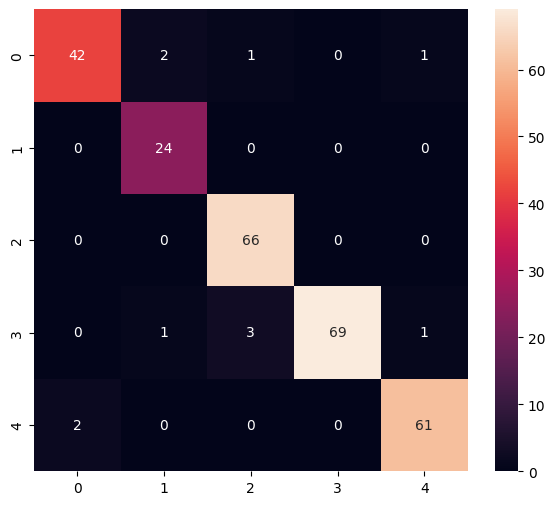

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        46
           1       0.89      1.00      0.94        24
           2       0.94      1.00      0.97        66
           3       1.00      0.93      0.97        74
           4       0.97      0.97      0.97        63

    accuracy                           0.96       273
   macro avg       0.95      0.96      0.96       273
weighted avg       0.96      0.96      0.96       273



In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [60]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [61]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmpb1dg25wa/assets


INFO:tensorflow:Assets written to: /tmp/tmpb1dg25wa/assets


Saved artifact at '/tmp/tmpb1dg25wa'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_2')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  281468937990592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  281468937993408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  281468474155328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  281468474154624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  281468474162192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  281468474162896: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1752651887.085445   11050 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1752651887.085479   11050 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.


6600

# Inference test

In [62]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [63]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [64]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [65]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 102 μs, sys: 7 μs, total: 109 μs
Wall time: 79.9 μs


In [66]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.0393749e-03 1.1149248e-06 9.7654486e-01 2.0453550e-02 1.9610967e-03]
2
